## Table of Content

<div class="alert alert-block alert-info" style="margin-top: 20px">

1. [import libraries](#0)<br>
2. [upLoading and read dataset](#1)<br>
3. [Data Cleaning](#2)<br>
4. [Visualization](#3) <br>
5. [Build model ML](#4) <br>
</div>


# import libraries<a id="0"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# upLoading and read dataset <a id="1"></a>


In [2]:
data = pd.read_csv("/kaggle/input/up-data/diabetes.csv")
##print("Successfully Imported Data!")
##Show data
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 768, dtype: bool

In [5]:
data.shape

(768, 9)

#### Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

##### 1-Pregnancies: Number of times pregnant
##### 2-Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
##### 3-BloodPressure: Diastolic blood pressure (mm Hg)
##### 4-SkinThickness: Triceps skin fold thickness (mm)
##### 5-Insulin: 2-Hour serum insulin (mu U/ml)
##### 6-BMI: Body mass index (weight in kg/(height in m)^2)
##### 7-DiabetesPedigreeFunction: Diabetes pedigree function
##### 8-Age: Age (years)
#### 9-Outcome: Class variable (0 or 1)

# Data Cleaning<a id="2"></a>

## 1-deals with Missing Values 


In [6]:
missing_values = data.isnull().sum()
missing_values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## then  no missing values in data
## If we have missing values then we can 
#### 1-Drop missing values
#### 2-Filling in missing values automatically
(Another option is to try and fill in the missing values)

In [7]:
#1 remove all the rows that contain a missing value
data_clean = data.dropna()
data_clean.shape

(768, 9)

In [8]:
#2 remove all columns with at least one missing value
columns_with_na_dropped = data.dropna(axis=1)
columns_with_na_dropped.head()
##data_clean.shape

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
#3 just how much data did we lose?
print("Columns in original dataset: ", data.shape[1])
print("Columns with na's dropped: " , columns_with_na_dropped.shape[1])

Columns in original dataset:  9
Columns with na's dropped:  9


In [10]:
#4 Filling in missing values automatically(replace all NA's with 0)
data_clean = data.fillna(0)
data_clean.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
#5 replace all NA's the value that comes directly after it in the same column, 
data_clean = data.fillna(method='bfill', axis=0) # bfill and backfill is the same
data_clean.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
data_clean.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## 2- detect and remove outliers

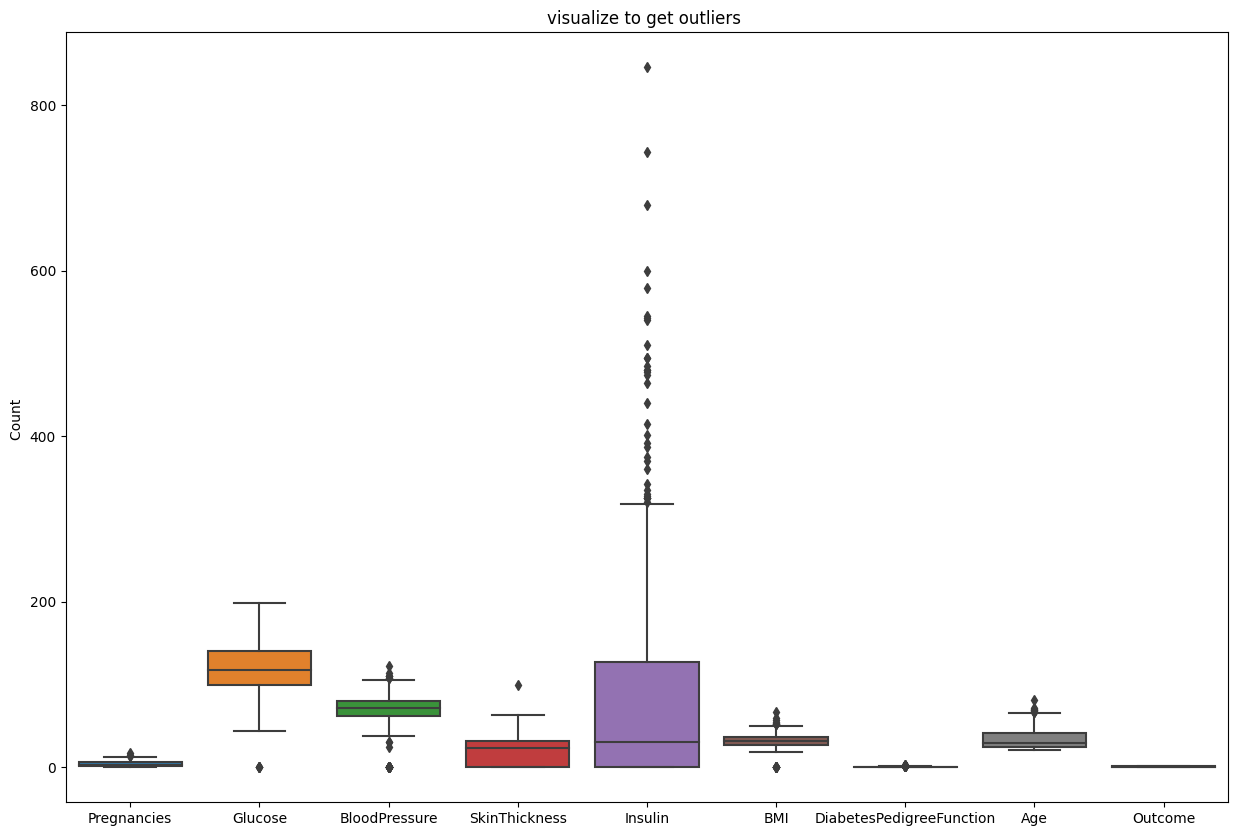

In [13]:
# Box Plot
##data.plot(kind='box', figsize=(15, 9))
plt.figure(figsize = (15,10))

sns.boxplot(data)
plt.title('visualize to get outliers ')
plt.ylabel('Count ')

plt.show()

<Axes: >

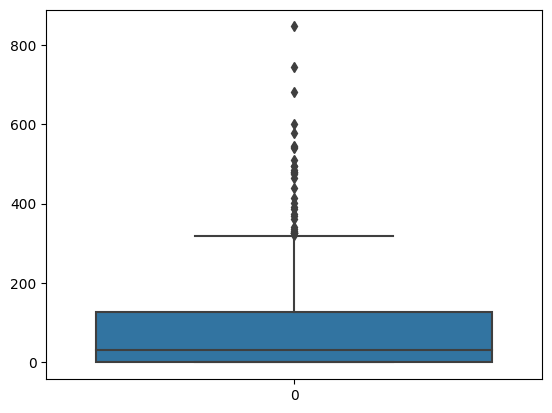

In [14]:
sns.boxplot(data['Insulin'])

In [15]:
#We conduct a stand alone observation review for the Insulin variable

Q1 = data.Insulin.quantile(0.25)
Q3 = data.Insulin.quantile(0.75)
IQR = Q3-Q1
# print(IQR)
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
print(lower,upper)

-190.875 318.125


In [16]:
# Above Upper bound
upper_array=list(np.where(data['Insulin']>=upper))
print("upper Bound:",upper)
print(sum(upper_array))
 
#Below Lower bound
lower_array=list(np.where(data['Insulin']<=lower))
print("Lower Bound:",lower)
print(sum(lower_array))

upper Bound: 318.125
[  8  13  54 111 139 153 186 220 228 231 247 248 258 286 296 360 370 375
 392 409 415 480 486 519 574 584 612 645 655 695 707 710 715 753]
Lower Bound: -190.875
[]


# Removing the outliers

In [17]:
data.describe().round(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


<Axes: >

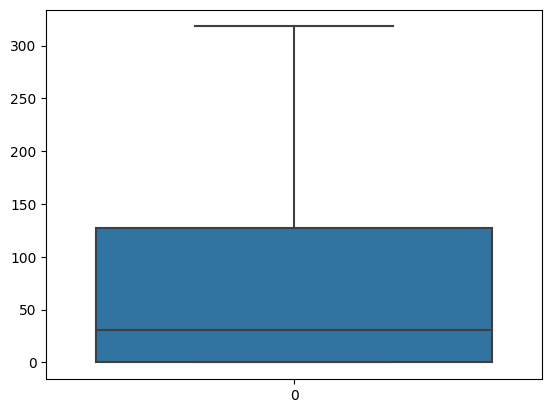

In [18]:
# Drop the outliers
# data = data[(data['Insulin'] >= lower_bound) 
#                 & (data['Insulin'] <= upper_bound)]
data.loc[data["Insulin"] > upper,"Insulin"] = upper
sns.boxplot(data['Insulin'])

Lower Bound : 30.393854408710446
Upper Bound : 107.81708309128956


<Axes: >

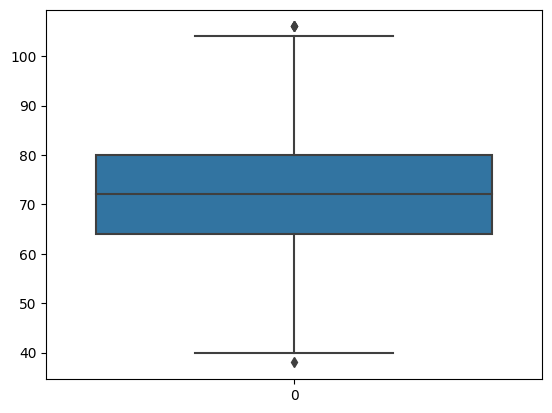

In [19]:
# calculate summary statistics
mean = data['BloodPressure'].mean()
std  = data['BloodPressure'].std()
 
# Calculate the lower and upper bounds
lower_bound = mean - std*2
upper_bound = mean + std*2
 
print('Lower Bound :',lower_bound)
print('Upper Bound :',upper_bound)
 
#Drop the outliers
data = data[(data['BloodPressure'] >= lower_bound) 
                & (data['BloodPressure'] <= upper_bound)]
sns.boxplot(data['BloodPressure'])

Lower Bound : 18.01295905180444
Upper Bound : 46.30460664667412


<Axes: >

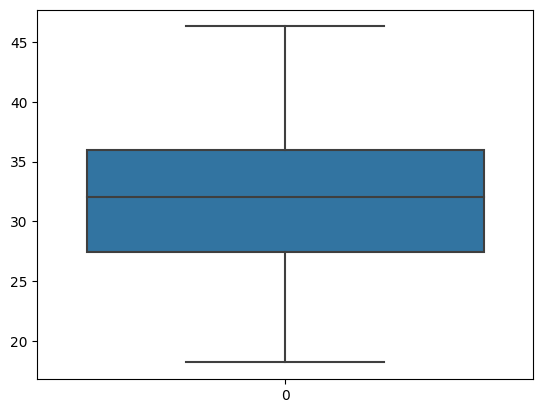

In [20]:
# calculate summary statistics
mean = data['BMI'].mean()
std  = data['BMI'].std()
 
# Calculate the lower and upper bounds
lower_bound = mean - std*2
upper_bound = mean + std*2
 
print('Lower Bound :',lower_bound)
print('Upper Bound :',upper_bound)
 
#Drop the outliers
data = data[(data['BMI'] >= lower_bound) 
                & (data['BMI'] <= upper_bound)]
sns.boxplot(data['BMI'])

Lower Bound : 9.749699178579124
Upper Bound : 56.81929086409514


<Axes: >

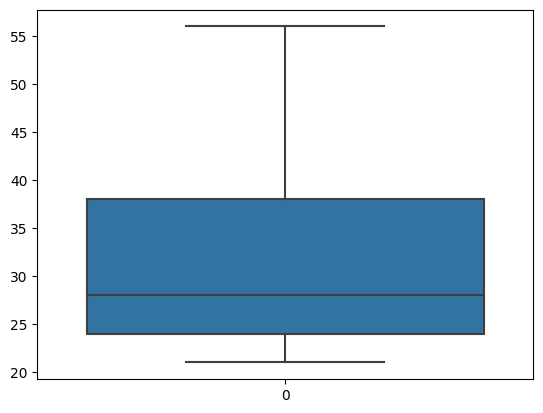

In [21]:
# calculate summary statistics
mean = data['Age'].mean()
std  = data['Age'].std()
 
# Calculate the lower and upper bounds
lower_bound = mean - std*2
upper_bound = mean + std*2
 
print('Lower Bound :',lower_bound)
print('Upper Bound :',upper_bound)
 
#Drop the outliers
data = data[(data['Age'] >= lower_bound) 
                & (data['Age'] <= upper_bound)]
sns.boxplot(data['Age'])

Lower Bound : 55.927783550301996
Upper Bound : 182.34494372242528


<Axes: >

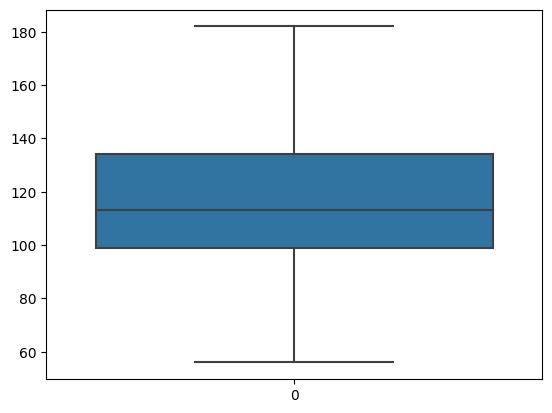

In [22]:
# calculate summary statistics
mean = data['Glucose'].mean()
std  = data['Glucose'].std()
 
# Calculate the lower and upper bounds
lower_bound = mean - std*2
upper_bound = mean + std*2
 
print('Lower Bound :',lower_bound)
print('Upper Bound :',upper_bound)
 
#Drop the outliers
data = data[(data['Glucose'] >= lower_bound) 
                & (data['Glucose'] <= upper_bound)]
sns.boxplot(data['Glucose'])

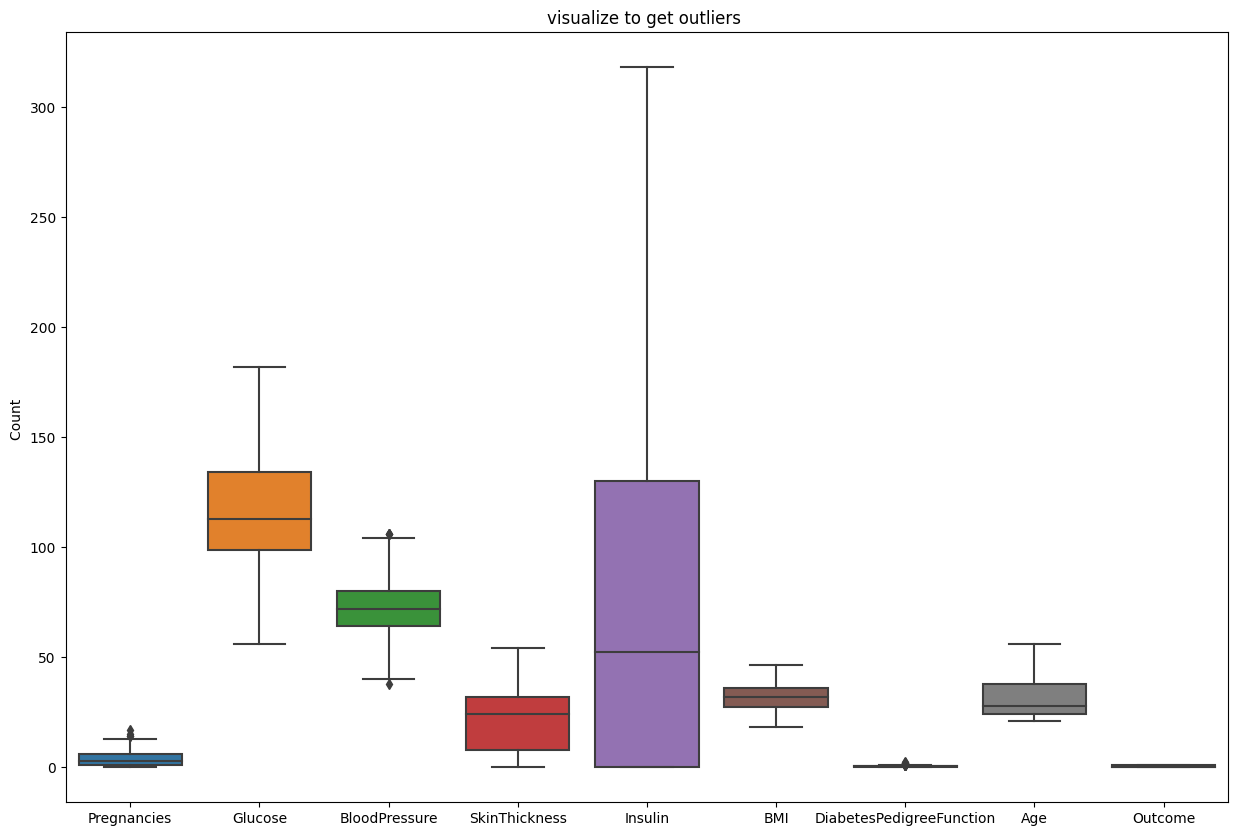

In [23]:
plt.figure(figsize = (15,10))

sns.boxplot(data)
plt.title('visualize to get outliers ')
plt.ylabel('Count ')

plt.show()

# 3- Scaling and Normalization

In [24]:
scalar=MinMaxScaler()
data=scalar.fit_transform(data)

<function matplotlib.pyplot.show(close=None, block=None)>

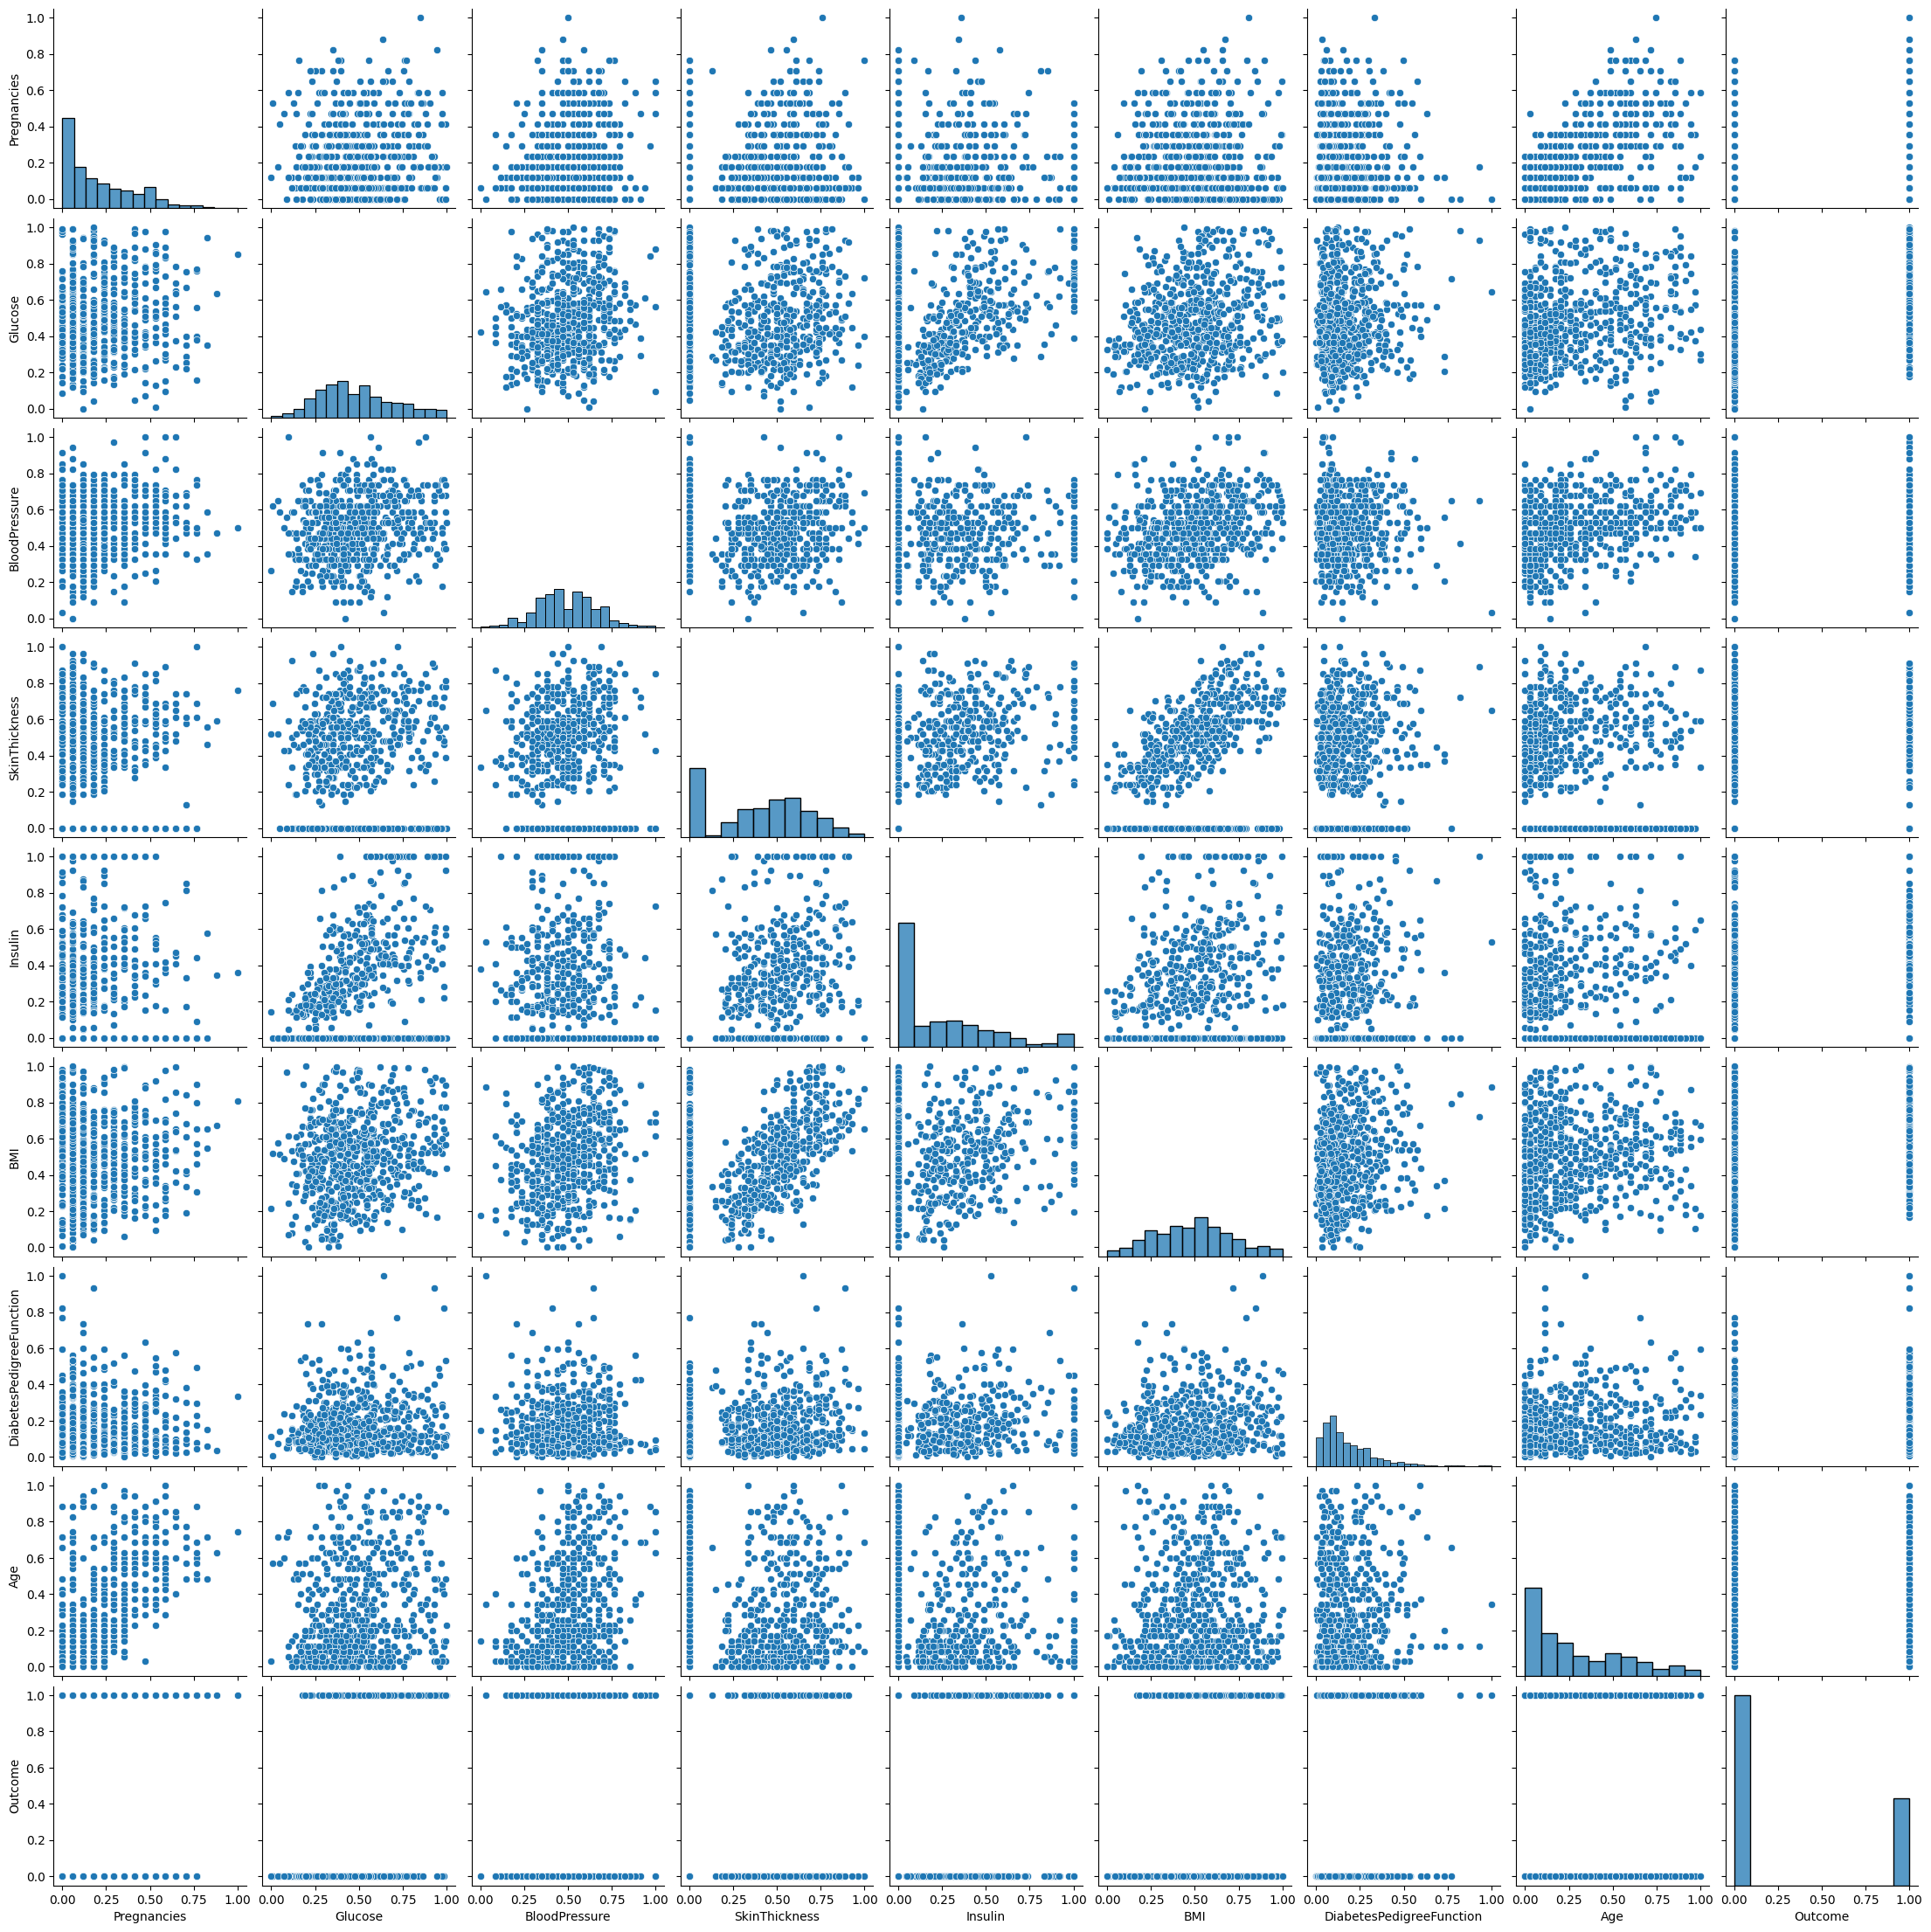

In [25]:
data=pd.DataFrame(data,columns=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome'])
sns.pairplot(data)
plt.show

In [26]:
data.describe().round(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,628.00,628.00,628.00,628.00,628.00,628.00,628.00,628.00,628.00
mean,0.22,0.49,0.49,0.40,0.24,0.49,0.17,0.29,0.31
std,0.20,0.21,0.17,0.28,0.28,0.22,0.14,0.27,0.46
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.06,0.34,0.38,0.14,0.00,0.33,0.08,0.09,0.00
50%,0.18,0.45,0.50,0.44,0.17,0.49,0.13,0.20,0.00
75%,0.35,0.62,0.62,0.59,0.41,0.64,0.24,0.49,1.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
